### Курс «Теория вероятностей и математическая статистика»
### Практическое задание к уроку 3
## Тема «Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных»

__Задача 1__

Даны значения зарплат из выборки выпускников:

`100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.`

Без использования статистических функций вроде `mean`, `std`, `var`, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [1]:
import warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
zp = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

# Среднее арифметическое
zp_mean = zp.sum() / zp.shape[0]
zp_mean, zp.mean()

(65.3, 65.3)

In [3]:
# Среднее квадратичное отклонение
zp_std = np.sqrt(((zp - zp_mean)**2).sum() / zp.shape[0])
zp_std, zp.std()

(30.823854398825596, 30.823854398825596)

In [4]:
# смещенная оценка дисперсии
zp_var = zp_std ** 2
zp_var, zp.var()

(950.11, 950.11)

In [5]:
# несмещенная оценка дисперсии
zp_var2 = ((zp - zp_mean)**2).sum() / (zp.shape[0] - 1)
zp_var2, zp.var(ddof=1)

(1000.1157894736842, 1000.1157894736842)

__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из `boxplot`. В этой задаче можно использовать статистические функции.

In [6]:
q1 = pd.Series(zp).quantile(0.25)
q1

42.0

In [7]:
q3 = pd.Series(zp).quantile(0.75)
q3

81.0

In [8]:
inter_q = q3 - q1
inter_q

39.0

<AxesSubplot:>

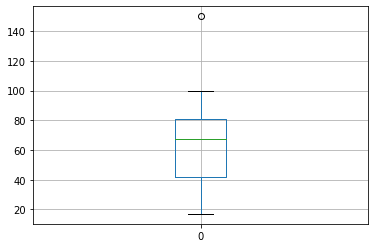

In [9]:
pd.DataFrame(zp).boxplot()

__Задача 3__

В университет на факультеты `A` и `B` поступило равное количество студентов, а на факультет `C` студентов поступило столько же, сколько на `A` и `B` вместе. Вероятность того, что студент факультета `A` сдаст первую сессию, равна 0.8. Для студента факультета `B` эта вероятность равна 0.7, а для студента факультета `C` - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете `A`? б) на факультете `B`? в) на факультете `C`?

_Замечание_: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [10]:
A = B = 0.25
C = A + B
p1_A = 0.8
p1_B = 0.7
p1_C = 0.9

In [11]:
# a) 
p_A = p1_A * A / (A * p1_A + B * p1_B + C * p1_C)
p_A

0.24242424242424246

In [12]:
# б)
p_B = p1_B * B / (A * p1_A + B * p1_B + C * p1_C)
p_B

0.21212121212121213

In [13]:
# в)
p_C = p1_C * C / (A * p1_A + B * p1_B + C * p1_C)
p_C

0.5454545454545455

In [14]:
# проверка
p_A + p_B + p_C

1.0